In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.7.0


In [4]:
# reading data
data = pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Customer churn prediction using Artificial Neural  Network**

Customer Churn is the measure why customers are leaving a business. In thi analysis we are looking at customer churn in a Bank, I will built a deep learning model to predict churn in the bank and use precision, recall, f1 score to measure perfomance

In [5]:
# first dropping rownumber, surname and customer id as it's of no use
data.drop(columns=['RowNumber','CustomerId','Surname'], inplace = True)

In [6]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# data types
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
Exited_cols = ['Exited']
for col in Exited_cols:
  data[col].replace({0 : 'no' ,1 : 'yes'}, inplace = True)


In [9]:
for col in data:
  print(f"{col}: {data[col].unique()}")

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


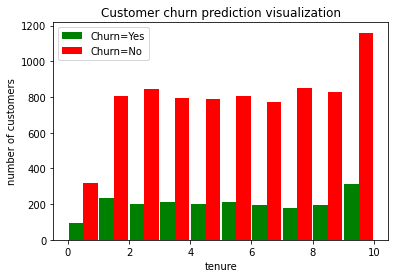

In [10]:
#Data visualization
tenure_exited_yes = data[data.Exited=='yes'].Tenure
tenure_exited_no = data[data.Exited=='no'].Tenure

plt.xlabel("tenure")
plt.ylabel("number of customers")
plt.title("Customer churn prediction visualization")
plt.hist([tenure_exited_yes,tenure_exited_no ], rwidth = 0.95 , color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


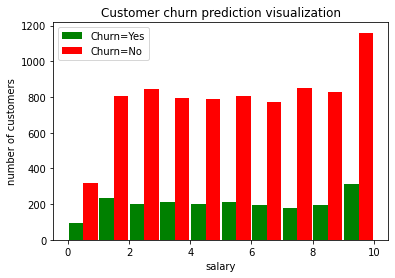

In [11]:
salary_exited_yes = data[data.Exited=='yes'].EstimatedSalary
salary_exited_no = data[data.Exited=='no'].EstimatedSalary

plt.xlabel("salary")
plt.ylabel("number of customers")
plt.title("Customer churn prediction visualization")
plt.hist([tenure_exited_yes,tenure_exited_no ], rwidth = 0.95 , color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [12]:
def print_unqiue_col_values(data):# function for checking unique values
  for column in data:
    if data[column].dtypes == 'object':
      print(f'{column}: {data[column].unique()}')

In [13]:
print_unqiue_col_values(data)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
Exited: ['yes' 'no']


**Some customers are male some female ,lets covert them to male : 1 , female : 0

In [14]:
data['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [15]:
data.Gender.unique()

array([1, 0])

In [16]:
# lets convert exited back to o and 1
data['Exited'].replace({'yes': 1 , 'no': 0}, inplace= True)

In [17]:
data.Exited.unique()

array([1, 0])

# **ONE HOT ENCODING FOR CATEGORICAL COLUMNS**

In [18]:
data.isnull().sum()# no missing values

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
data_clean = pd.get_dummies(data = data , columns=['Geography'])
data_clean.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [20]:
data_clean.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
204,512,0,33,3,176666.62,1,1,0,94670.77,0,0,0,1
3263,447,0,43,2,0.00,2,1,0,33879.26,1,1,0,0
5166,455,1,43,6,0.00,1,1,1,81250.79,0,0,0,1
862,725,0,41,7,113980.21,1,1,1,116704.25,0,1,0,0
2223,722,0,34,8,0.00,2,1,1,133447.49,0,1,0,0


In [21]:
# scaling
cols_to_scale = ['CreditScore', 'Age','Tenure', 'Balance', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_clean[cols_to_scale] = scaler.fit_transform(data_clean[cols_to_scale])

In [22]:
for col in data_clean:
  print(f'{col}: {data_clean[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [23]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  float64
 3   Tenure             10000 non-null  float64
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  uint8  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
dtypes: float64(5), int64(5), uint8(3)
memory usage: 810.7 KB


**Our data is scaled**

TRAIN TEST SPLIT

In [24]:
x = data_clean.drop("Exited", axis = 'columns')
y = data_clean['Exited']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [25]:
x_train.shape

(8000, 12)

In [26]:
x_test.shape

(2000, 12)

In [27]:
x_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,0.6,0.000000,2,0,0,0.096273,0,0,1
4154,0.752,0,0.216216,0.3,0.000000,2,1,0,0.981478,1,0,0
3881,0.476,1,0.621622,0.3,0.000000,1,1,1,0.948551,1,0,0
9238,0.846,1,0.432432,0.4,0.000000,2,1,0,0.646869,1,0,0
5210,0.402,0,0.229730,0.7,0.517012,2,0,0,0.434670,1,0,0
7487,0.602,1,0.513514,0.4,0.000000,1,0,0,0.421898,1,0,0
7542,0.314,1,0.216216,0.4,0.000000,2,1,1,0.303413,0,0,1
7524,0.620,1,0.297297,0.8,0.666330,1,1,1,0.925815,1,0,0
9412,0.750,0,0.108108,0.6,0.393324,1,0,0,0.668609,1,0,0
6377,0.684,0,0.202703,0.9,0.000000,1,1,0,0.567526,1,0,0


In [28]:
len(x_train.columns)

12

BUILDING A MODEL (ARTIFICIAL NEURAL NETWORK) IN TENSORFLOW / KERAS

In [29]:
from tensorflow import keras


model = keras.Sequential([
       keras.layers.Dense(26 , input_shape =(12,), activation = 'relu'),
       keras.layers.Dense(10 , activation = 'relu'),
       keras.layers.Dense(1 , activation = 'sigmoid')                  
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train , y_train , epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5009 - accuracy: 0.7896
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4540 - accuracy: 0.8065
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.8150
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8216
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8311
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8307
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.8350
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8390
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.8419
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3708 - accura

In [30]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3515 - accuracy: 0.8560


[0.3514707386493683, 0.8560000061988831]

In [31]:
#making predictions
yp = model.predict(x_test)
yp[:5]

array([[0.03037751],
       [0.07939589],
       [0.08500805],
       [0.06785041],
       [0.05164856]], dtype=float32)

In [32]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [33]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [34]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

Our model is working perfectly

In [35]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.76      0.43      0.55       405

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



Text(69.0, 0.5, 'Truth')

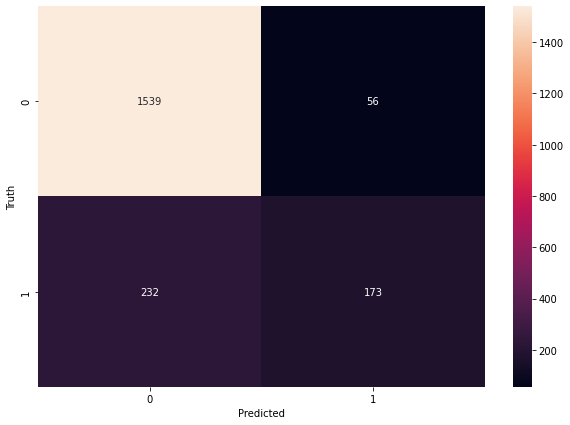

In [36]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_pred)


plt.figure(figsize = (10 ,7))
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
x_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,0.6,0.000000,2,0,0,0.096273,0,0,1
4154,0.752,0,0.216216,0.3,0.000000,2,1,0,0.981478,1,0,0
3881,0.476,1,0.621622,0.3,0.000000,1,1,1,0.948551,1,0,0
9238,0.846,1,0.432432,0.4,0.000000,2,1,0,0.646869,1,0,0
5210,0.402,0,0.229730,0.7,0.517012,2,0,0,0.434670,1,0,0


#**testing the model  on the entry 1**

In [44]:
customer = [619 ,0 , 42 , 2 , 0, 1, 1 ,1 , 101349 , 1 ,0 , 0]
customer = np.array([customer])
scaler.fit_transform(customer)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [45]:
 
pred = model.predict(customer)
 
if pred[0] == 1:
  print('customer will leave')
else:
  print('Faithful customer')

customer will leave


In [46]:
pred

array([[1.]], dtype=float32)